<a href="https://colab.research.google.com/github/ACM-Research/vr-user-behavior-clustering/blob/Clustering-Algorithm/BK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

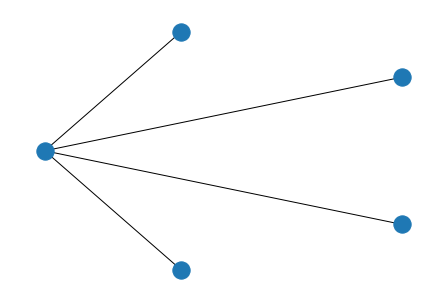

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(1,4),(1,5)])
G.number_of_nodes()
nx.draw_shell(G)

{1: 0.5, 2: 1.0, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 0, 10: 0, 11: 0, 12: 0}


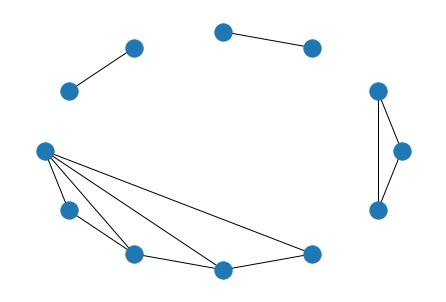

In [ ]:
G.add_edges_from([(2,3),(3,4),(4,5)])
G.add_edges_from([(6,7),(7,8),(8,6),(9,10)])
G.add_node(11)
G.add_node(12)
G.add_edge(11,12)

nx.draw_shell(G)

print(nx.clustering(G))


In [ ]:
# OTHER IMPLEMENTATION

graph = [[0,1,0,0,1,0],[1,0,1,0,1,0],[0,1,0,1,0,0],[0,0,1,0,1,1],[1,1,0,1,0,0],[0,0,0,1,0,0]]


def N(vertex):
  return [i for i, n_v in enumerate(graph[vertex]) if n_v]

def Bron_Kerbosch(R,P,X):
  if len(P) == 0 and len(X) == 0:
    print(R)
  for vertex in P[:]:
    r_new = R[:]
    r_new.append(vertex)
    p_new = [val for val in P if val in N(vertex)]
    x_new = [val for val in X if val in N(vertex)]
    Bron_Kerbosch(r_new,p_new,x_new)
    P.remove(vertex)
    if(vertex in X):
      X.remove(vertex)
Bron_Kerbosch([],[1,2,3,4,5], [])

[1, 2]
[1, 4]
[2, 3]
[3, 4]
[3, 5]
[4]
[5]


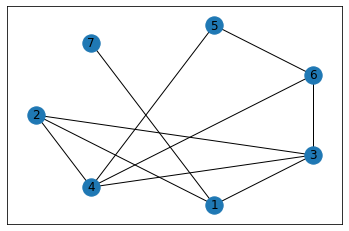

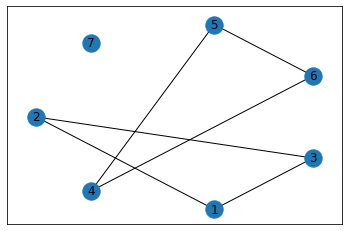

In [ ]:
def getClusters(graph):
    clusters = []
    currentGraph = graph.copy()
    
    while currentGraph.number_of_nodes() > 0:
        cliqueIterator = nx.find_cliques(currentGraph)
        maxClique = next(cliqueIterator)

        # Find the clique with the most nodes.
        for clique in cliqueIterator:
            if len(clique) > len(maxClique):
                maxClique = clique

        # Append the clique with the most nodes to the cluster list.
        clusters.append(maxClique)
        
        # Remove nodes in the clique from the graph.
        currentGraph.remove_nodes_from(maxClique)
        
    return clusters
    

graph = nx.Graph()
graph.add_edges_from([(2, 4), (1, 3), (2, 3), (3, 6), (4, 5), (5, 6), (1, 7), (1, 2), (3, 4), (4, 6)])
pos = nx.shell_layout(graph)
nx.draw_networkx(graph, pos=pos)
plt.show()

clusters = getClusters(graph)
for cluster in clusters:
    clusterGraph = graph.subgraph(cluster)
    nx.draw_networkx(clusterGraph, pos=pos)
    
plt.show()